In [51]:
using Plots, QuadGK
pyplot()
include("src.jl")

Main.vopp

## Mean Abs Dev Plots

### Illustrating calls for debugging and timing

In [61]:
mu = 1
S = 2
M = 1
mode = 1
dev = .01

#r_mp_p, best_price_p, dist = vopp._low_bnd_primal_unimodal_MAD(mu, S, M, dev, mode)
# r_mp_uni, best_price_uni = vopp.vopp_lb_unimodal_MAD(mu, S, M, dev, mode)
# r_mp, best_price = vopp.vopp_lb_symmetric_MAD(mu, S, M, dev)
#(r_mp_uni, best_price_uni), (r_mp, best_price)

# println("UB Analytic")
# @time vopp.vopp_MAD(S, M, dev)

# println("UB Unimodal")
# @time vopp.vopp_MAD_unimodal(mu, S, M, dev, mode)

# println("UB Symmetric")
# @time vopp.vopp_sym_unimodal_MAD(mu, S, M, dev, mode)  

# println("LB Analytic")
# @time vopp.lower_bound_unimodal(dev, M)

println("LB UNIMODAL")
@time r_mp_uni, best_price_uni = vopp.vopp_lb_unimodal_MAD(mu, S, M, dev, mode, safe_fail = true)
@time r_mp_uni_p, best_price_uni_p, tvals, dist = vopp._low_bnd_primal_unimodal_MAD(mu, S, M, dev, mode)

println("LB Symmetric")
@time r_mp_sym, best_price_sym = vopp.vopp_lb_symmetric_MAD(mu, S, M, dev, safe_fail=true)

LB UNIMODAL
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

(1.0259198506130542, 0.9891538205273408)

In [59]:
(r_mp_uni, best_price_uni), (r_mp_uni_p, best_price_uni_p), (r_mp_sym, best_price_sym)

((1.190616254106975, 0.9891538205273408), (1.1904761904761907, 1.0), (1.1958096736253674, 0.9891538205273408))

In [62]:
##Can inspect an approximate tight distribution in this way.
filt = dist .> 0
[tvals[filt] dist[filt]]

3×2 Array{Float64,2}:
 0.0      0.02    
 1.01702  0.869333
 1.04705  0.110667

In [32]:
#Rough Loop over dev_grid
S = 2
M = 1
mu = 1
mode = 1

#dev_grid = range(0., stop=vopp.max_dev(S, M) - 1e-3, length=50)
dev_grid = range(0., stop=.5, length=20)
ub_analytic = zero(dev_grid)
ub_uni = zero(dev_grid)
ub_sym = zero(dev_grid)

lb_analytic = zero(dev_grid)
lb_uni = zero(dev_grid)
lb_sym = zero(dev_grid)

for (ix, dev) in enumerate(dev_grid)
    println("Dev:\t", dev)
    #    ub_analytic[ix] = vopp.vopp_MAD(S, M, dev)[1]  
    ub_uni[ix] = vopp.vopp_MAD_unimodal(mu, S, M, dev, mode)  
    ub_sym[ix] = vopp.vopp_sym_unimodal_MAD(mu, S, M, dev, mode)  

    lb_analytic[ix] = vopp.lower_bound_unimodal(dev, M)  
    lb_uni[ix]   = vopp.vopp_lb_unimodal_MAD(mu, S, M, dev, mode, safe_fail=true)[1]
    lb_sym[ix] = vopp.vopp_lb_symmetric_MAD(mu, S, M, dev, safe_fail = true)[1]    
end

Dev:	0.0


┌ Warning: Deprecated syntax `implicit assignment to global variable `dev``.
│ Use `global dev` instead.
└ @ nothing none:0
┌ Warning: Loop variable `dev` around In[32]:15 overwrites a variable in an enclosing scope. In the future the variable will be local to the loop instead.
└ @ nothing In[32]:15


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


0.02631578947368421
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


0.13157894736842105
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


0.21052631578947367
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


0.2631578947368421
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only
Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.2631578947368421 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.2631578947368421 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.2894736842105263
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.2894736842105263 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.2894736842105263 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.3157894736842105
Academic license - for non-commercial use only
Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.3157894736842105 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.3157894736842105 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.34210526315789475
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only
Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.34210526315789475 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.34210526315789475 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.3684210526315789
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.3684210526315789 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.3684210526315789 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.39473684210526316
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only
Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.39473684210526316 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.39473684210526316 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.42105263157894735
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.42105263157894735 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.42105263157894735 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.4473684210526316
Academic license - for non-commercial use only
Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.4473684210526316 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.4473684210526316 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.47368421052631576
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only
Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.47368421052631576 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.47368421052631576 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Dev:	0.5
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Academic license - for non-commercial use only


┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212
┌ Warning: Not solved to optimality, status: Unbounded
└ @ JuMP /Users/vishalgupta/.julia/packages/JuMP/I7whV/src/solvers.jl:212


Problem likely infeasible.  Dual Status:	Unbounded
Deviation 0.5 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc
Deviation 0.5 > .25, problem likely infeasible
Safe_fail set to true. Aborting Calc


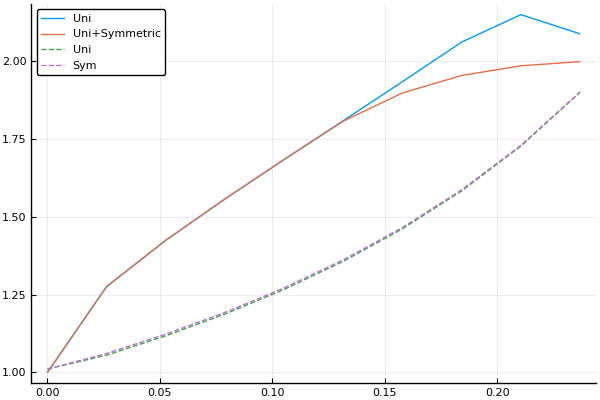

In [38]:
#plot(dev_grid, ub_analytic, marker=:circ, label="WC")
plot(dev_grid[ub_uni .> 0], ub_uni[ub_uni .> 0], label="Uni")
plot!(dev_grid[ub_sym .> 0], ub_sym[ub_sym .> 0], label="Uni+Symmetric")
#plot!(dev_grid[lb_analytic .> 0], lb_analytic[lb_analytic .> 0], linestyle=:dash, label="WC-Uni")
plot!(dev_grid[lb_uni .> 0], lb_uni[lb_uni .> 0], linestyle=:dash, label="Uni")
plot!(dev_grid[lb_sym .> 0], lb_sym[lb_sym .> 0], linestyle=:dash, label="Sym")

#[dev_grid wc_bound]

### Coefficient of Variation

In [ ]:
using Plots, QuadGK
pyplot()
include("src.jl")

In [ ]:
# S = 2
# M = 1
# mu = 1
# mode = 1
# # @time vopp.vopp_CV(S, M, mu, .1, method=:ConstraintGeneration)
# # @time vopp.vopp_CV_unimodal(mu, S, M, .1, mode)
# # @time vopp.vopp_sym_unimodal_CV(mu, S, M, .1, mode)
# println(vopp.vopp_lb_unimodal_CV(mu, S, M, 0.5763502691896258, mode))
# println(vopp._low_bnd_primal_unimodal_CV(mu, S, M, 0.5763502691896258, mode))
# #vopp.max_cv_unimodal_guess(mu, S, M, mode)

In [ ]:
S = 2
M = 1
mu = 1
mode = 1

cv_grid = range(0, stop=vopp.max_cv(S, M)-.001, length=50)

max_unimodal_cv = vopp.max_cv_unimodal_guess(mu, S, M, mode)

# wc = zero(cv_grid)
# ub_uni = zero(cv_grid)
# ub_sym = zero(cv_grid)
lb_uni = zero(cv_grid)

for ix = 1:length(cv_grid)
    println("CV:\t", cv_grid[ix])
    wc[ix]  = vopp.vopp_CV(S, M, mu, cv_grid[ix], method=:ConstraintGeneration)
    ub_uni[ix] = vopp.vopp_CV_unimodal(mu, S, M, cv_grid[ix], mode)
    ub_sym[ix] = vopp.vopp_sym_unimodal_CV(mu, S, M, cv_grid[ix], mode)
    if cv_grid[ix] <= max_unimodal_cv
        lb_uni[ix] = vopp.vopp_lb_unimodal_CV(mu, S, M, cv_grid[ix], mode, TOL=1e-4)[1]
    end
end


In [ ]:
plot(cv_grid, wc, marker=:circ, label="WC")
plot!(cv_grid[ub_uni .> 0], ub_uni[ub_uni .> 0], label="Uni")
plot!(cv_grid[ub_sym .> 0], ub_sym[ub_sym .> 0], label="Uni+Sym")
plot!(cv_grid[lb_uni .> 0], lb_uni[lb_uni .> 0], linestyle = :dash, label="Uni")

### Geometric mean

In [ ]:
### This section is deprecated... Not all separators implemented

In [ ]:
S = 4
M = .9
mu = 1

Sc = vopp.comp_Sc(S, M)
B = 0.24
# h(t) = log(t / B)

# sep_fun(a, b, lam1, lam2, M, mu) = vopp.sep_GM(a, b, lam1, lam2, M, mu, B)                                        
# vopp._vopp_moment_primal(S, M, mu, h), vopp._vopp_moment_dual(S, M, mu, h, sep_fun), vopp._vopp_GM(S, M, mu, B, false, 500)
vopp.vopp_GM(S, M, mu, B, useSep=false)

In [ ]:
S = 4
M = .9  #Geometric Mean doesn't work if you have weight at zero.  
mu = 1
Sc = vopp.comp_Sc(S, M)

B_grid = range(vopp.min_gm(S, M, mu) + .01, stop=1., length=25)
out = zero(cv_grid)
out2 = zero(cv_grid)

for ix = 1:length(cv_grid)
    h(t)= -log(t/mu) + log(B_grid[ix]/mu)
    out[ix] = vopp.vopp_GM(S, M, mu, B_grid[ix], useSep=true)
    out2[ix] = vopp._vopp_moment_primal(S, M, mu, h)
end


In [ ]:
vopp.min_gm(S, M, mu)

In [ ]:
plot(B_grid, [out out2], marker=:circ)

In [ ]:
p_grid = collect(range(1, stop=2, length=10 + 1))
p_grid = vcat(2 .- p_grid[2:end], p_grid)
sort!(p_grid)


### Playing around

In [ ]:
include("src.jl")

In [ ]:
D = .3
M = 1
h(t) = M/2 * abs(t-1) - D
mode = 1.2
H_un(t) = quadgk(h, t, mode)[1]

a = -.1
b = 0
c = -1.3

l = 0
u = 4
println("True Min:\t", vopp._sep_LB_Unimodal_MAD_2(M, D, a, b, c, mode, l, u))


fun(t) = a * t^2 + b * t + c * H_un(t)

t_grid = range(l, stop=u, length=101)
fun_grid = map(fun, t_grid)

println("Approx Min:\t", minimum(fun_grid), " ", t_grid[argmin(fun_grid)])
plot(t_grid, fun_grid)


In [ ]:
using D